<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>🎬 Cinema Tickets Analysis 🎬
</strong></h1>
</div>

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Import Necessary Libraries</strong></h1>
</div>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

# For suppressing warnings
warnings.filterwarnings('ignore')

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong> Importing the Dataset</strong></h1>
</div>


In [37]:
file_path = (r"F:\Experiences\02-CognoRise InfoTech-DS-Internship\Datasets\06- Cinema Tickets.csv")
df =pd.read_csv(file_path)

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Explore the Basics of The Dataset</strong></h1>
</div>

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


In [39]:
df.describe()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
count,142524.000000,142524.000000,1.425240e+05,142524.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142524.000000
mean,1518.985111,320.378427,1.234728e+07,140.137570,0.237413,3.932103,19.965986,81234.599886,139.900157,854.723605,6.776852,2.634721,16.112585
std,36.184450,159.701229,3.065486e+07,279.758733,2.923206,3.056276,22.653445,33236.599278,279.564935,953.118103,2.195843,0.809692,8.949471
min,1471.000000,32.000000,2.000000e+04,1.000000,0.000000,1.000000,0.000000,483.870968,-219.000000,-2.000000,2.000000,1.000000,1.000000
25%,1485.000000,181.000000,1.260000e+06,18.000000,0.000000,2.000000,3.750000,60000.000000,18.000000,276.994486,5.000000,2.000000,8.000000
50%,1498.000000,324.000000,3.720000e+06,50.000000,0.000000,3.000000,10.350000,79454.235185,50.000000,525.714286,7.000000,3.000000,16.000000
75%,1556.000000,474.000000,1.110000e+07,143.000000,0.000000,5.000000,28.210000,100000.000000,143.000000,1038.961039,9.000000,3.000000,24.000000
max,1589.000000,637.000000,1.262820e+09,8499.000000,311.000000,60.000000,147.500000,700000.000000,8499.000000,9692.097160,11.000000,4.000000,31.000000


In [40]:
df.isnull().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

<div style="text-align: center;"> <h1 style="font-size: 36px;"><strong>Handling Missing Values</strong></h1> </div>

In [41]:
# Handle missing values
df['occu_perc'] = df['occu_perc'].fillna(df['occu_perc'].median())
df['capacity'] = df['capacity'].fillna(df['capacity'].median())

In [42]:
df.isnull().sum()

film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
date            0
month           0
quarter         0
day             0
dtype: int64

In [43]:
row, col =df.shape
print(f'Number of rows in Dataset: {row} and Number of Columns: {col}' )

Number of rows in Dataset: 142524 and Number of Columns: 14


In [44]:
df.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


In [45]:
df.sample(5)

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
36533,1558,522,7200000,48,0,3,18.82,150000.0,48,255.047821,2018-08-16,8,3,16
97933,1564,539,720000,9,0,2,2.90,80000.0,9,310.344828,2018-08-23,8,3,23
4168,1497,266,1060000,8,0,3,1.64,132500.0,8,487.804878,2018-05-26,5,2,26
15759,1494,182,2400000,60,0,1,10.56,40000.0,60,568.181818,2018-06-09,6,2,9
22662,1511,324,350000,5,0,2,1.24,70000.0,5,403.225806,2018-07-25,7,3,25


In [46]:
df.columns

Index(['film_code', 'cinema_code', 'total_sales', 'tickets_sold',
       'tickets_out', 'show_time', 'occu_perc', 'ticket_price', 'ticket_use',
       'capacity', 'date', 'month', 'quarter', 'day'],
      dtype='object')

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Finding the Duplicate in The Dataset</strong></h1>
</div>

In [47]:
df[df.duplicated()]

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
56269,1484,448,324719994,2170,0,13,83.49,149640.550230,2170,2599.113666,2018-03-24,3,1,24
56270,1484,637,304000000,1700,0,1,10.35,178823.529412,1700,525.714286,2018-03-24,3,1,24
56271,1484,344,136500000,914,3,6,57.20,149343.544858,911,1597.902098,2018-03-24,3,1,24
56272,1484,304,98100000,661,0,5,87.20,148411.497731,661,758.027523,2018-03-24,3,1,24
56273,1484,163,97080000,813,0,8,80.65,119409.594096,813,1008.059516,2018-03-24,3,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56370,1484,315,2500000,50,0,2,16.67,50000.000000,50,299.940012,2018-03-24,3,1,24
56371,1484,487,1600000,16,0,5,1.31,100000.000000,16,1221.374046,2018-03-24,3,1,24
56372,1484,472,1575000,25,0,1,8.68,63000.000000,25,288.018433,2018-03-24,3,1,24
56373,1484,299,1100000,28,0,2,3.00,39285.714286,28,933.333333,2018-03-24,3,1,24


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Exploratory Data Analysis (EDA)</strong></h1>
</div>


<div style="text-align: center;"> <h1 style="font-size: 26px;"><strong>Monthly Sales Trend</strong></h1> </div>

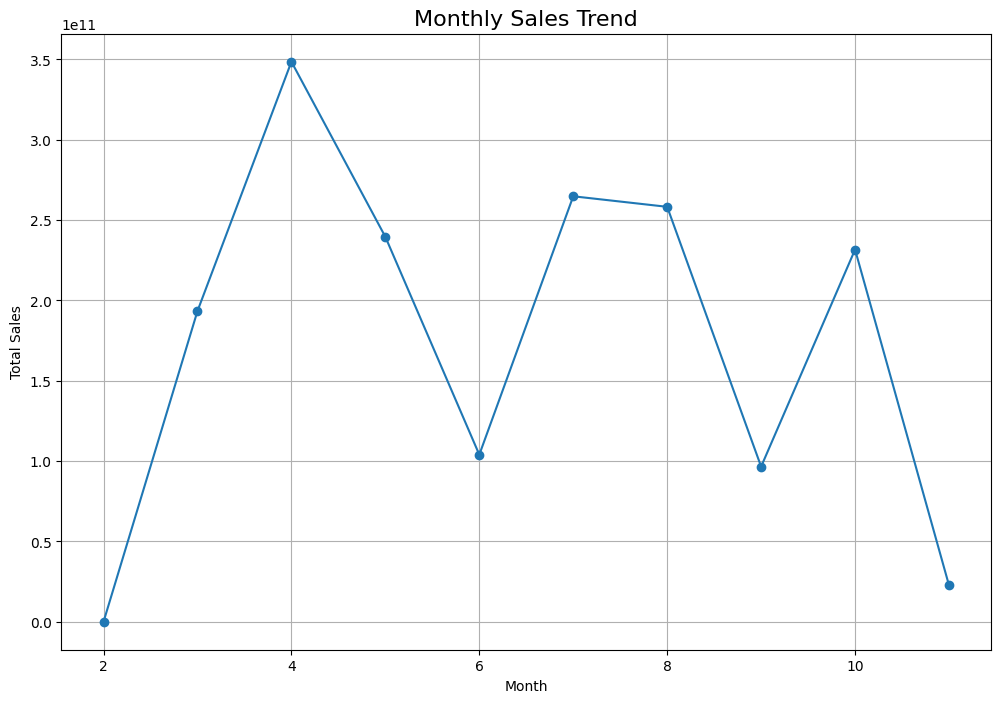

In [48]:
# Monthly sales trend
plt.figure(figsize=(12, 8))
monthly_sales = df.groupby('month')['total_sales'].sum()
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

<div style="text-align: center;"> <h1 style="font-size: 36px;"><strong>Occupancy Percentage vs Ticket Price</strong></h1> </div>

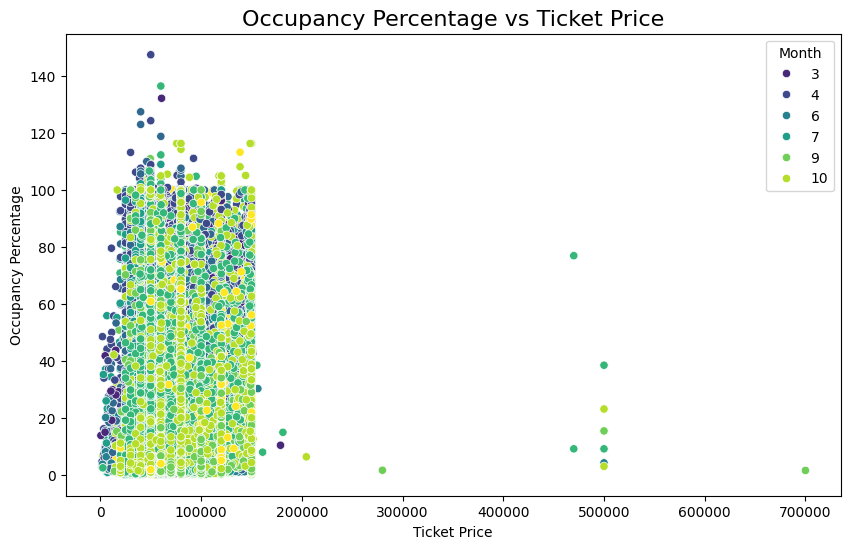

In [49]:
# Occupancy percentage vs Ticket Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ticket_price', y='occu_perc', data=df, hue='month', palette='viridis')
plt.title('Occupancy Percentage vs Ticket Price', fontsize=16)
plt.xlabel('Ticket Price')
plt.ylabel('Occupancy Percentage')
plt.legend(title='Month')
plt.show()

<div style="text-align: center;"> <h1 style="font-size: 36px;"><strong>Top 10 Cinemas by Total Sales</strong></h1> </div>

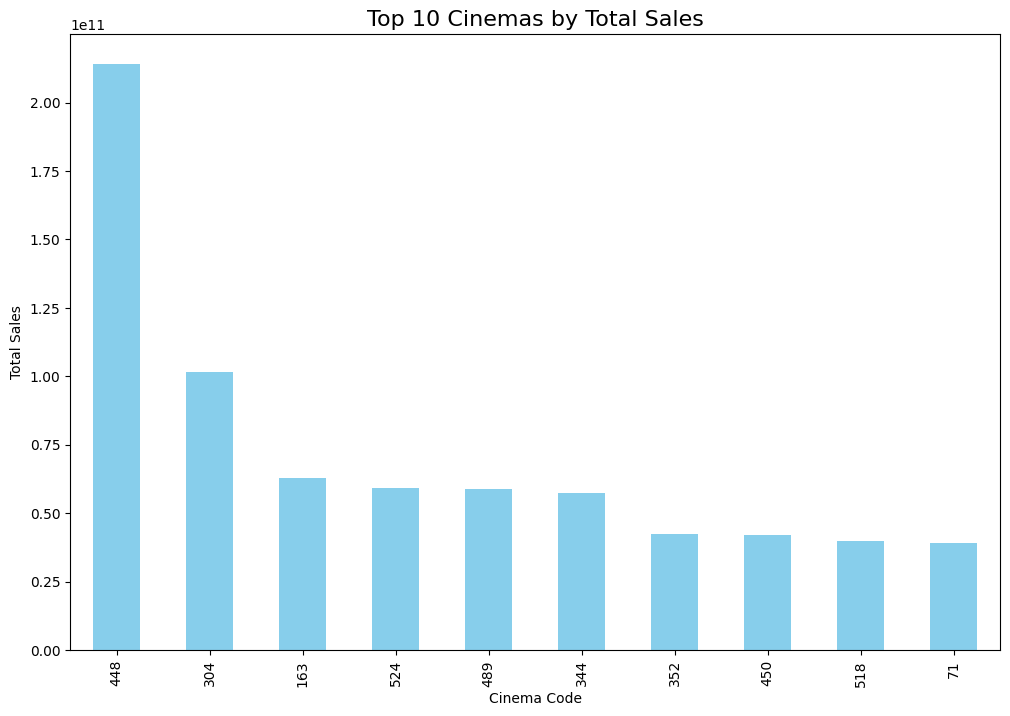

In [50]:
# Total sales by Cinema
plt.figure(figsize=(12, 8))
top_cinemas = df.groupby('cinema_code')['total_sales'].sum().nlargest(10)
top_cinemas.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cinemas by Total Sales', fontsize=16)
plt.xlabel('Cinema Code')
plt.ylabel('Total Sales')
plt.show()

<div style="text-align: center;"> <h1 style="font-size: 36px;"><strong>Time Series Analysis and Forecasting</strong></h1> </div>

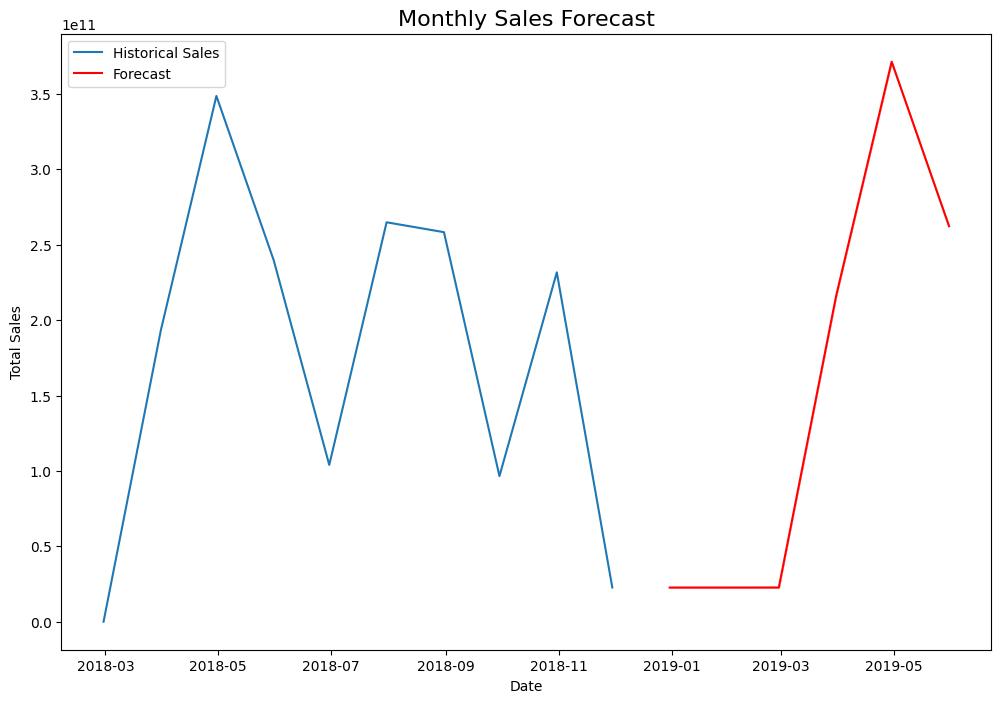

                                     SARIMAX Results                                      
Dep. Variable:                        total_sales   No. Observations:                   10
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   0.000
Date:                            Thu, 19 Sep 2024   AIC                             10.000
Time:                                    22:28:46   BIC                                nan
Sample:                                02-28-2018   HQIC                               nan
                                     - 11-30-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0        nan        nan           0           0
ma.L1               0         -0   

In [51]:
# Prepare data for time series analysis
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
monthly_sales_ts = df['total_sales'].resample('M').sum()

# SARIMAX Model
model = SARIMAX(monthly_sales_ts, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Forecasting the next 6 months
forecast = results.get_forecast(steps=6)
forecast_index = pd.date_range(start=monthly_sales_ts.index[-1] + pd.DateOffset(months=1), periods=6, freq='M')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)
forecast_conf_int = forecast.conf_int()

plt.figure(figsize=(12, 8))
plt.plot(monthly_sales_ts, label='Historical Sales')
plt.plot(forecast_series, label='Forecast', color='red')
plt.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='red', alpha=0.3)
plt.title('Monthly Sales Forecast', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

# Model Diagnostics
print(results.summary())


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Conclusion</strong></h1>
</div>


<div >
    <h1 style="font-size: 16px;"><strong>
The SARIMAX model developed for predicting total sales from cinema tickets offers insights into the dynamics of cinema attendance over the eight-month period. Despite the model's simplicity, it highlights significant challenges in capturing the underlying patterns, as indicated by the coefficient estimates nearing zero and potential issues with model stability.

The results show that both the autoregressive (AR) and moving average (MA) components did not yield significant contributions, suggesting a need for model refinement. The model's AIC value of 10 indicates a baseline, yet it also points to the necessity for more comprehensive variable inclusion or different seasonal parameters to improve performance.

While the model currently exhibits limitations, it serves as a foundation for further exploration of cinema sales dynamics, including potential enhancements through additional data, such as audience demographics and film genre. With iterative improvements, this approach could become a valuable tool for optimizing screening strategies and forecasting ticket sales, ultimately contributing to informed decision-making in the cinema industry.
</div>

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>The End</strong></h1>
</div>

<!-- 
#MuhammadAdeel 
#DataScientist 
#DataScienceEnthusiast 
#MPhilDataScience 
#Python 
#DataAnalysis 
#MachineLearning 
#Multan 
#Pakistan 
#GitHub 
#LinkedIn
#EDA
#cirrhossis
#datacleaning
-->